ML - Task3 - Data Preprocessing
Objective:
 The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.
Dataset:     Dataset for Data preprocessing
Key Components to be fulfilled:
Data Exploration:   Explore the data, list down the unique values in each feature and find its length. Perform the statistical analysis and renaming of the columns.
Data Cleaning: 
Find the missing and inappropriate values, treat them appropriately. Remove all duplicate rows. Find the outliers.
Replace the value 0 in age as NaN
Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)
Data Analysis:
Filter the data with age >40 and salary<5000
Plot the chart with age and salary
Count the number of people from each place and represent it visually
Data Encoding:
Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.
Feature Scaling: 
After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

#### Data exploration and cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
F=pd.read_csv("Employee.csv")
F

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [17]:
F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [5]:
F.describe(include="all")

,Company,Age,Salary,Place,Country,Gender
count,140,130.000000,124.000000,134,148,148.000000
unique,6,NaN,NaN,11,1,NaN
top,TCS,NaN,NaN,Mumbai,India,NaN
freq,53,NaN,NaN,37,148,NaN
mean,NaN,30.484615,5312.467742,NaN,NaN,0.222973
std,NaN,11.096640,2573.764683,NaN,NaN,0.417654
min,NaN,0.000000,1089.000000,NaN,NaN,0.000000
25%,NaN,22.000000,3030.000000,NaN,NaN,0.000000
50%,NaN,32.500000,5000.000000,NaN,NaN,0.000000
75%,NaN,37.750000,8000.000000,NaN,NaN,0.000000


In [6]:
F.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [7]:
F.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [8]:
F.duplicated().sum()


4

In [9]:
F.drop_duplicates(inplace=True)
F

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [10]:
F['Gender'].unique()


array([0, 1], dtype=int64)

In [11]:
F['Gender'].replace({0: 'M', 1: 'F'}, inplace=True)
F['Gender'].unique()

array(['M', 'F'], dtype=object)

In [12]:
F['Age'].unique()


array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17.,  0., 54.])

In [13]:
F.loc[F['Age'] == 0, 'Age'] = np.nan
F['Age'].unique()

array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17., 54.])

In [14]:
F.isnull().all(axis=0).sum()  # Checked for empty rows


0

In [15]:
F1=F.copy()
F1

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,M
1,Infosys,30.0,NaN,Mumbai,India,M
2,TCS,35.0,2300.0,Calcutta,India,M
3,Infosys,40.0,3000.0,Delhi,India,M
4,TCS,23.0,4000.0,Mumbai,India,M
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,M
143,TCS,33.0,9024.0,Calcutta,India,F
145,Infosys,44.0,4034.0,Delhi,India,F
146,TCS,33.0,5034.0,Mumbai,India,F


In [16]:
F1.isnull().sum()  


Company     8
Age        23
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

In [17]:
F1.Company.mode()


0    TCS
Name: Company, dtype: object

In [18]:
F1.Age.mean()


32.04132231404959

In [19]:
F1.Salary.mean()


5283.471074380165

In [20]:
F1.Place.mode()


0    Mumbai
Name: Place, dtype: object

In [21]:
F1=F.fillna(value={'Company':'TCS','Salary':'5283.0','Age':'32.0','Place':'Mumbai'})
F1

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.0,Chennai,India,M
1,Infosys,30.0,5283.0,Mumbai,India,M
2,TCS,35.0,2300.0,Calcutta,India,M
3,Infosys,40.0,3000.0,Delhi,India,M
4,TCS,23.0,4000.0,Mumbai,India,M
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,M
143,TCS,33.0,9024.0,Calcutta,India,F
145,Infosys,44.0,4034.0,Delhi,India,F
146,TCS,33.0,5034.0,Mumbai,India,F


In [22]:
F1.drop(columns='Country', inplace=True)
F1

,Company,Age,Salary,Place,Gender
0,TCS,20.0,5283.0,Chennai,M
1,Infosys,30.0,5283.0,Mumbai,M
2,TCS,35.0,2300.0,Calcutta,M
3,Infosys,40.0,3000.0,Delhi,M
4,TCS,23.0,4000.0,Mumbai,M
...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,M
143,TCS,33.0,9024.0,Calcutta,F
145,Infosys,44.0,4034.0,Delhi,F
146,TCS,33.0,5034.0,Mumbai,F


In [23]:
F1.describe(include='all')


,Company,Age,Salary,Place,Gender
count,144,144,144,144,144
unique,6,29,41,11,2
top,TCS,32.0,5283.0,Mumbai,M
freq,60,23,23,48,112


In [24]:
F1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  144 non-null    object
 1   Age      144 non-null    object
 2   Salary   144 non-null    object
 3   Place    144 non-null    object
 4   Gender   144 non-null    object
dtypes: object(5)
memory usage: 6.8+ KB


In [25]:
F1.isnull().sum()


Company    0
Age        0
Salary     0
Place      0
Gender     0
dtype: int64

### Company, age,salary,place has null values. They are replaced by their mean and mode values.
### The Dataset contains 148 rows and 6 columns where 3 are Numerical and the other 3 are categorical columns. On analysing the presence of null values Features like columns, salary, age and place had null values and to overcome this the categorical columns are replaced by their most repeated class and the numerical columns with their average value.

In [26]:
F1.Company.unique()


array(['TCS', 'Infosys', 'CTS', 'Tata Consultancy Services', 'Congnizant',
       'Infosys Pvt Lmt'], dtype=object)

In [27]:
F1.Company.replace({'Tata Consultancy Services':'TCS','Infosys Pvt Lmt':'Infosys'},inplace=True)


In [28]:
F1.Company.unique()


array(['TCS', 'Infosys', 'CTS', 'Congnizant'], dtype=object)

In [29]:
F1.Company.nunique()


4

In [30]:
F1.Place.unique()


array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'], dtype=object)

In [31]:
F1.Place.nunique()


11

In [32]:
F1['Company'].value_counts()


Company
TCS           62
Infosys       45
CTS           35
Congnizant     2
Name: count, dtype: int64

In [33]:
F1['Place'].value_counts()


Place
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

In [34]:
F1['Age'].value_counts()


Age
32.0    23
22.0    15
33.0    13
44.0    10
23.0     8
34.0     8
32.0     7
21.0     7
35.0     6
41.0     5
24.0     4
45.0     4
31.0     3
40.0     3
43.0     3
36.0     3
25.0     3
20.0     3
46.0     2
26.0     2
30.0     2
50.0     2
37.0     2
19.0     1
38.0     1
51.0     1
18.0     1
17.0     1
54.0     1
Name: count, dtype: int64

#### From the Above analysis, we can see that more Employees are from TCS company followed by Infosys. Also more number of employees are located at Mumbai and the least at Bhopal and Nagpur. Considering the Employee Age group it is observed that almost 18 people are in the age of 30. Also on an average the employee age lies between 20-45 which then gradually decreases.

In [35]:
F1.reset_index(drop=True, inplace=True)
F1

,Company,Age,Salary,Place,Gender
0,TCS,20.0,5283.0,Chennai,M
1,Infosys,30.0,5283.0,Mumbai,M
2,TCS,35.0,2300.0,Calcutta,M
3,Infosys,40.0,3000.0,Delhi,M
4,TCS,23.0,4000.0,Mumbai,M
...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,M
140,TCS,33.0,9024.0,Calcutta,F
141,Infosys,44.0,4034.0,Delhi,F
142,TCS,33.0,5034.0,Mumbai,F


### Data analysis

In [36]:
Countdf=pd.DataFrame({"No_of_Employees":F1.Place.value_counts()}).reset_index()
Countdf.columns = ['Place','No_of_Employees']
Countdf

,Place,No_of_Employees
0,Mumbai,48
1,Calcutta,32
2,Chennai,14
3,Delhi,14
4,Cochin,13
5,Noida,8
6,Hyderabad,8
7,Podicherry,3
8,Pune,2
9,Bhopal,1


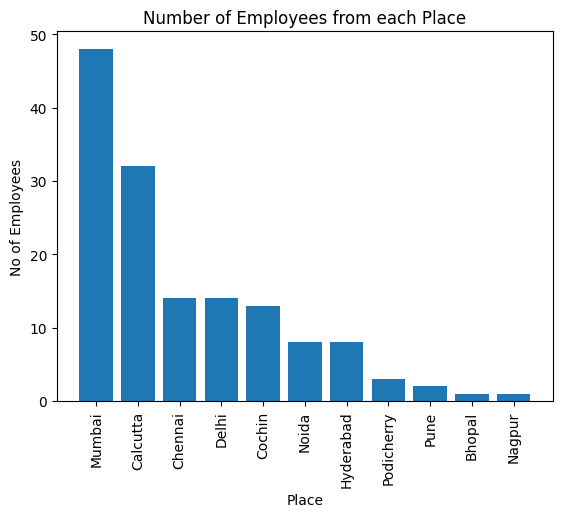

In [37]:
plt.bar(Countdf['Place'],Countdf['No_of_Employees'])
plt.title('Number of Employees from each Place')
plt.xlabel('Place')
plt.ylabel('No of Employees')
plt.xticks(rotation="vertical")
plt.show()

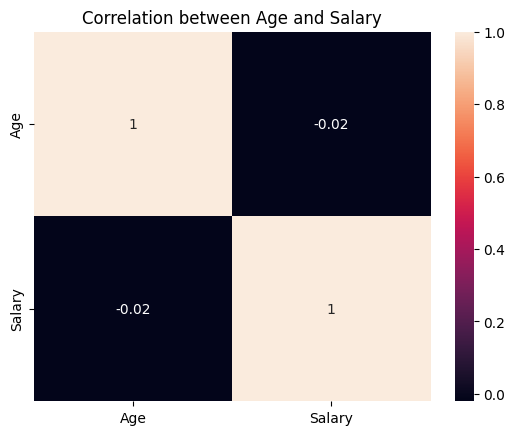

In [38]:
F2 = F1.drop(['Company', 'Gender', 'Place'], axis=1)
corr = F2.corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation between Age and Salary")
plt.show()

### Data encoding and feature scaling

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [40]:
df_one_hot_encoded=pd.get_dummies(data=F1,columns = ['Company','Place','Gender'])

df_one_hot_encoded

,Age,Salary,Company_CTS,Company_Congnizant,Company_Infosys,Company_TCS,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Gender_F,Gender_M
0,20.0,5283.0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True
1,30.0,5283.0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,35.0,2300.0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True
3,40.0,3000.0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
4,23.0,4000.0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,22.0,8202.0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
140,33.0,9024.0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False
141,44.0,4034.0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False
142,33.0,5034.0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False


In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
F1['Company']=label_encoder.fit_transform(F1['Company'])
F1['Place']=label_encoder.fit_transform(F1['Place'])
F1['Gender']=label_encoder.fit_transform(F1['Gender'])
F1

,Company,Age,Salary,Place,Gender
0,3,20.0,5283.0,2,1
1,2,30.0,5283.0,6,1
2,3,35.0,2300.0,1,1
3,2,40.0,3000.0,4,1
4,3,23.0,4000.0,6,1
...,...,...,...,...,...
139,2,22.0,8202.0,6,1
140,3,33.0,9024.0,1,0
141,2,44.0,4034.0,4,0
142,3,33.0,5034.0,6,0


#### All the categorical datas are encoded to the numerical data using one-hot encoding and label encoding



## standard scaling

In [42]:
scaler = StandardScaler()
scaler.fit(df_one_hot_encoded)
scaled_data_ss = scaler.transform(df_one_hot_encoded)
scaled_data_ss


array([[-1.46656902e+00, -1.67718000e-04, -5.66657672e-01, ...,
        -1.18678166e-01, -5.34522484e-01,  5.34522484e-01],
       [-2.47954254e-01, -1.67718000e-04, -5.66657672e-01, ...,
        -1.18678166e-01, -5.34522484e-01,  5.34522484e-01],
       [ 3.61353128e-01, -1.26409057e+00, -5.66657672e-01, ...,
        -1.18678166e-01, -5.34522484e-01,  5.34522484e-01],
       ...,
       [ 1.45810642e+00, -5.29379800e-01, -5.66657672e-01, ...,
        -1.18678166e-01,  1.87082869e+00, -1.87082869e+00],
       [ 1.17630175e-01, -1.05671167e-01, -5.66657672e-01, ...,
        -1.18678166e-01,  1.87082869e+00, -1.87082869e+00],
       [-1.22284607e+00,  1.23663778e+00, -5.66657672e-01, ...,
        -1.18678166e-01, -5.34522484e-01,  5.34522484e-01]])

## min max scaler

In [43]:
scaler = MinMaxScaler()
scaler.fit(df_one_hot_encoded)
scaled_data_mm = scaler.transform(df_one_hot_encoded)
scaled_data_mm

array([[0.08108108, 0.47729601, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.35135135, 0.47729601, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.48648649, 0.13781723, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.72972973, 0.33515421, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.43243243, 0.44895869, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.13513514, 0.80949129, 0.        , ..., 0.        , 0.        ,
        1.        ]])